### Identifying patients with a risk of cardio disease 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import xgboost as xgb
import shap
from sklearn.metrics import accuracy_score

In [5]:
import shap

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [11]:
from sklearn.metrics import confusion_matrix

In [345]:
data=pd.read_csv('data1.csv')

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [347]:
data.describe()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [348]:
data.head(10)

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,60.038356,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,60.583562,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,61.873973,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,48.405479,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,54.339726,1,164,68.0,110,60,1,1,0,0,0,0


In [349]:
data.rename(columns={'age_year':'age','ap_hi':'systolic_blood_pressure','ap_lo':'diastolic_blood_pressure',
                     'gluc':'glucose_level','smoke':'smoker', 'alco':'alcohol_consump',
                     'active':'physical_activity', 'cardio':'heart_disease'}, inplace=True)

In [350]:
data.head()

,id,age_days,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity,heart_disease
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [351]:
data = data.drop('age_days',1)


In [352]:
data = data.drop('id',1)

In [353]:
data.head()

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity,heart_disease
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [272]:
#Transform variable age to integer without the decimal part

data['age']=data['age'].apply(lambda x: round(x,1))

In [273]:
#Transform variable height from sentimeter to foot

#data['height']=data['height'].apply(lambda x: round(x/30.48,1))

In [274]:
#Transform variable weight from kg to lbs

#data['weight']= data['weight'].apply(lambda x: round(x*2.205,1))


In [354]:
#Creating new column for Body Index
data['BMI']=data['weight']/(data['height']/100)**2

In [356]:
#For BMI below 25 we will arrange 0 - healthy range , for BMI higher 25 - we will arrange 1 - overweight
data['BMI']=data.BMI.apply(lambda x: 1 if x>=25 else 0)

In [357]:
data.head(3)

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity,heart_disease,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,0


In [363]:
data= data.drop('weight',1)


In [364]:
data= data.drop('height',1)

In [367]:
data=data[['age','gender','BMI','systolic_blood_pressure','diastolic_blood_pressure','cholesterol','glucose_level','smoker','alcohol_consump','physical_activity','heart_disease']]

In [368]:
data.head()

,age,gender,BMI,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity,heart_disease
0,50.391781,2,0,110,80,1,1,0,0,1,0
1,55.419178,1,1,140,90,3,1,0,0,1,1
2,51.663014,1,0,130,70,3,1,0,0,0,1
3,48.282192,2,1,150,100,1,1,0,0,1,1
4,47.873973,1,0,100,60,1,1,0,0,0,0


0    35021
1    34979
Name: heart_disease, dtype: int64


<AxesSubplot:>

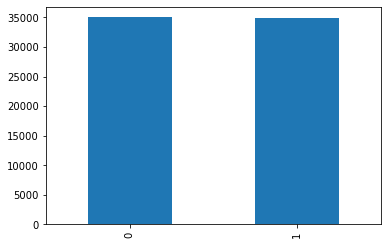

In [369]:
target_balance = data.heart_disease.value_counts() 
print(target_balance)

target_balance.plot(kind='bar')

In [370]:
X = data.loc[:,'age':'physical_activity']
y = data['heart_disease']

In [371]:
X.head()

,age,gender,BMI,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity
0,50.391781,2,0,110,80,1,1,0,0,1
1,55.419178,1,1,140,90,3,1,0,0,1
2,51.663014,1,0,130,70,3,1,0,0,0
3,48.282192,2,1,150,100,1,1,0,0,1
4,47.873973,1,0,100,60,1,1,0,0,0


In [372]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [373]:
logit_1= LogisticRegression(C=1000)
logit_1.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1000)

In [374]:
logit_1.score(X_test,y_test)

0.7035

In [375]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit_1.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit_1.score(X_test, y_test)))

The score for logistic regression is
Training:  70.28%
Test set:  70.35%


In [376]:
print('Logistic regression validation metrics:  \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (
         precision_score(y_val, logit_1.predict(X_test)), 
         recall_score(y_val, logit_1.predict(X_test)),
         f1_score(y_val, logit_1.predict(X_test))
        )
     )

Logistic regression validation metrics:  
 Precision: 0.5055 
 Recall: 0.4612 
 F1: 0.4823


Sklearn logistic regression we should make sure to scale our features prior to fitting, since regularzation is used by default 

In [377]:
std_scale = StandardScaler()


X_train_scaled = std_scale.fit_transform(X_train)
X_val_scaled= std_scale.fit_transform(X_val)
X_test_scaled= std_scale.fit_transform(X_test)

logit_2 = LogisticRegression()
logit_2.fit(X_train_scaled, y_train)

y_predict = logit_2.predict(X_train_scaled) 
logit_2.score(X_train_scaled, y_train)

0.7167380952380953

In [378]:
print("The score for logistic regression 2 is")
print("Training: {:6.2f}%".format(100*logit_2.score(X_train_scaled, y_train)))
print("Val set: {:6.2f}%".format(100*logit_2.score(X_test_scaled, y_test)))

The score for logistic regression 2 is
Training:  71.67%
Val set:  71.13%


In [379]:
print('Logistic regression 2 validation metrics:  \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (
         precision_score(y_val, logit_2.predict(X_val_scaled)), 
         recall_score(y_val, logit_2.predict(X_val_scaled)),
         f1_score(y_val, logit_2.predict(X_val_scaled))
        )
     )

Logistic regression 2 validation metrics:  
 Precision: 0.7672 
 Recall: 0.6245 
 F1: 0.6885


In [380]:
from sklearn.metrics import roc_auc_score, roc_curve


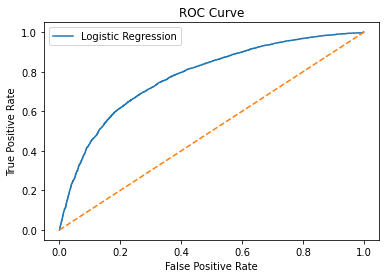

In [381]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, logit_2.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression'])

In [382]:
logit_1_confusion = confusion_matrix(y_test, logit_2.predict(X_test_scaled))
logit_1_confusion

array([[5254, 1838],
       [2204, 4704]])

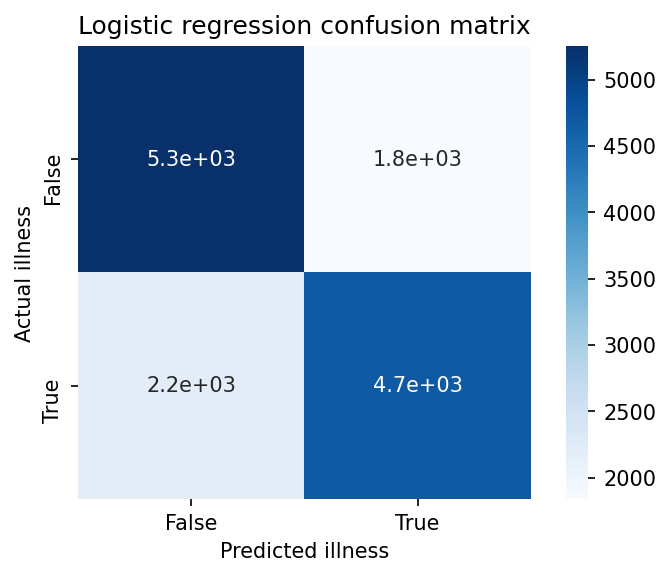

In [383]:
logit_1_confusion = confusion_matrix(y_test, logit_2.predict(X_test_scaled))
plt.figure(dpi=150)
sns.heatmap(logit_1_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['False','True'],
           yticklabels=['False','True'])

plt.xlabel('Predicted illness')
plt.ylabel('Actual illness')
plt.title('Logistic regression confusion matrix');

#### For a start, it is not bad. However, let's try other models and ensembles of different models to check the best-performing path. 

### kNN Model

In [384]:

knn_model = KNeighborsClassifier(15)


In [385]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=15)

In [386]:
print("The score for KNN model is")
print("Training: {:6.2f}%".format(100*knn_model.score(X_train_scaled, y_train)))
print("Val set: {:6.2f}%".format(100*knn_model.score(X_val_scaled, y_val)))

The score for KNN model is
Training:  74.23%
Val set:  71.36%


In [387]:
print('kNN validation metrics:  \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (
         precision_score(y_val, knn_model.predict(X_val_scaled)), 
         recall_score(y_val, knn_model.predict(X_val_scaled)),
         f1_score(y_val, knn_model.predict(X_val_scaled))
        )
     )

kNN validation metrics:  
 Precision: 0.7255 
 Recall: 0.6950 
 F1: 0.7099


### Random Forest Model

In [388]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy')


In [389]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [390]:
print("The score for Random Forest Classifier is")
print("Training: {:6.2f}%".format(100*rf_model.score(X_train, y_train)))
print("Val set: {:6.2f}%".format(100*rf_model.score(X_val, y_val)))

The score for Random Forest Classifier is
Training:  98.45%
Val set:  65.65%


In [391]:
print('Random Forest validation metrics:  \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (
         precision_score(y_val, rf_model.predict(X_val)), 
         recall_score(y_val, rf_model.predict(X_val)),
         f1_score(y_val, rf_model.predict(X_val))
        )
     )

Random Forest validation metrics:  
 Precision: 0.6571 
 Recall: 0.6669 
 F1: 0.6619


### Extra Trees

In [392]:
et_model = ExtraTreesClassifier(n_estimators=100)

In [393]:
et_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [394]:
print("The score for Extra Trees Classifier is")
print("Training: {:6.2f}%".format(100*et_model.score(X_train, y_train)))
print("Val set: {:6.2f}%".format(100*et_model.score(X_val, y_val)))

The score for Extra Trees Classifier is
Training:  98.47%
Val set:  64.86%


In [395]:
print('Extra Trrs validation metrics:  \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (
         precision_score(y_val, rf_model.predict(X_val)), 
         recall_score(y_val, rf_model.predict(X_val)),
         f1_score(y_val, rf_model.predict(X_val))
        )
     )

Extra Trrs validation metrics:  
 Precision: 0.6571 
 Recall: 0.6669 
 F1: 0.6619


### XG Boost 

In [396]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', 
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


0.7325714285714285

In [397]:
print('Gradient Boosting validation metrics:  \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (
         precision_score(y_val, gbm.predict(X_val)), 
         recall_score(y_val, gbm.predict(X_val)),
         f1_score(y_val, gbm.predict(X_val))
        )
     )

Gradient Boosting validation metrics:  
 Precision: 0.7599 
 Recall: 0.6836 
 F1: 0.7197


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

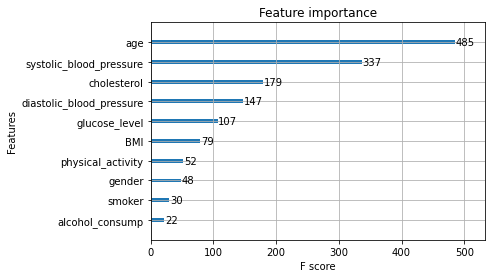

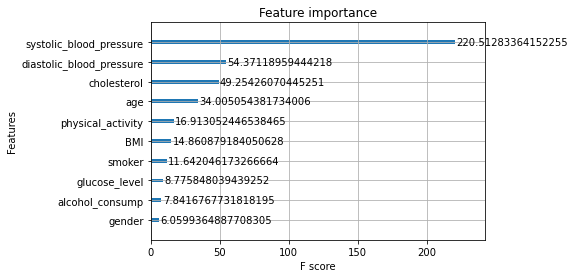

In [398]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')

### Gaussian Naive Bayes

In [399]:
nb_model = GaussianNB()

In [400]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [401]:
print("The score for Naive Bayes is")
print("Training: {:6.2f}%".format(100*nb_model.score(X_train, y_train)))
print("Val set: {:6.2f}%".format(100*nb_model.score(X_val, y_val)))

The score for Naive Bayes is
Training:  58.95%
Val set:  58.56%


In [402]:
print('Naive Bayes validation metrics:  \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (
         precision_score(y_val, nb_model.predict(X_val)), 
         recall_score(y_val, nb_model.predict(X_val)),
         f1_score(y_val, nb_model.predict(X_val))
        )
     )

Naive Bayes validation metrics:  
 Precision: 0.7157 
 Recall: 0.2956 
 F1: 0.4184


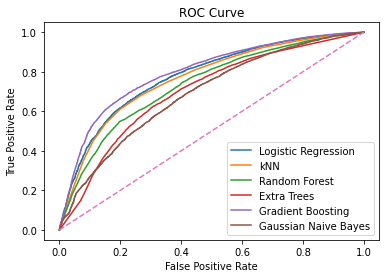

In [403]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, logit_2.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, et_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)



x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','kNN', 'Random Forest', 'Extra Trees', 'Gradient Boosting', 'Gaussian Naive Bayes'])

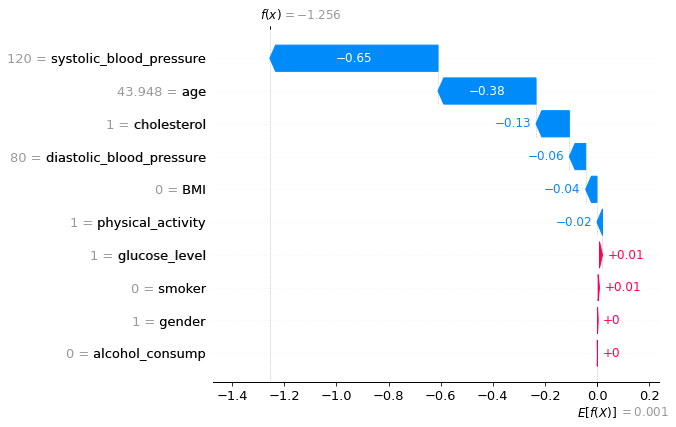

In [405]:
explainer = shap.Explainer(gbm)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

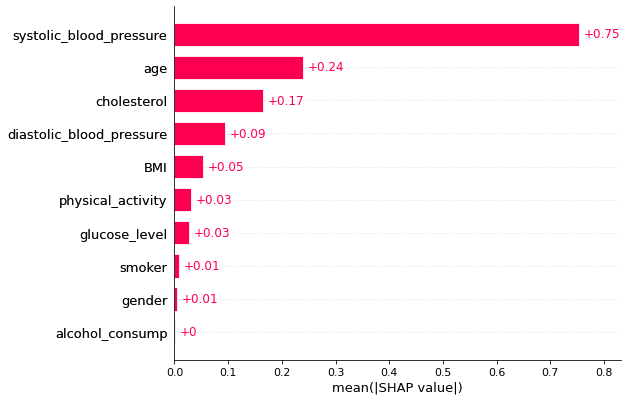

In [406]:
shap.plots.bar(shap_values)

####  For this project, identifying the positive class is more important than the total accuracy of the model. The best model amply the highest recall. The best result has Random Forest from the previous models so we will continue with it. 

In [407]:
print("The recall we have recived from different models:")
print("Logistic Regression: {:6.2f}%".format(100*recall_score(y_val, logit_2.predict(X_val_scaled))))
print("kNN: {:6.2f}%".format(100*recall_score(y_val, knn_model.predict(X_val_scaled))))
print("Random Forest: {:6.2f}%".format(100*recall_score(y_val, rf_model.predict(X_val))))
print("Extra Trees: {:6.2f}%".format(100*recall_score(y_val, rf_model.predict(X_val))))
print("Gradient Boosting: {:6.2f}%".format(100*recall_score(y_val, gbm.predict(X_val))))
print("Naive Bayes: {:6.2f}%".format(100*recall_score(y_val, nb_model.predict(X_val))))

The recall we have recived from different models:
Logistic Regression:  62.45%
kNN:  69.50%
Random Forest:  66.69%
Extra Trees:  66.69%
Gradient Boosting:  68.36%
Naive Bayes:  29.56%


#### However, the base Random Forest model shows a big overfitting (the difference in accuracy between train and validation data is more than 30%)

In [408]:
print("The score for Random Forest Classifier is")
print("Training: {:6.2f}%".format(100*rf_model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*rf_model.score(X_val, y_val)))

The score for Random Forest Classifier is
Training:  98.45%
Test set:  65.65%


#### So we need to tune hyperparameters in order to reduce overfitting
#### 1. Increase n_estimators, the more trees, the less likely the RF is to overfit
#### 2. reduce max_features parameter
#### 3. max_depth tuned to 12 
#### 4. tuned max_samples_leaf greater than 2.

In [410]:
rf_model_new = RandomForestClassifier(n_estimators=170, criterion='entropy', max_features=3, max_depth=12, min_samples_leaf=3)

In [411]:
rf_model_new.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features=3,
                       min_samples_leaf=3, n_estimators=170)

In [412]:
print("The score for Random Forest New Classifier is")
print("Training: {:6.2f}%".format(100*rf_model_new.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*rf_model_new.score(X_val, y_val)))

The score for Random Forest New Classifier is
Training:  76.04%
Test set:  72.96%


In [413]:
print('Random Forest test metrics:  \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (
         precision_score(y_test, rf_model_new.predict(X_test)), 
         recall_score(y_test, rf_model_new.predict(X_test)),
         f1_score(y_test, rf_model_new.predict(X_test))
        )
     )

Random Forest test metrics:  
 Precision: 0.7565 
 Recall: 0.6824 
 F1: 0.7176


In [414]:
rf_confusion = confusion_matrix(y_test, rf_model_new.predict(X_test))
rf_confusion

array([[5575, 1517],
       [2194, 4714]])

#### As our goal is to receive the highest recall, I will try to use soft prediction with the thresholds 0.3 and 0.4.

In [415]:
rf_confusion_04 = confusion_matrix(y_test, (rf_model_new.predict_proba(X_test)[:,1]>=0.4).astype(int))
rf_confusion_04

array([[4806, 2286],
       [1587, 5321]])

In [416]:
rf_confusion_03 = confusion_matrix(y_test, (rf_model_new.predict_proba(X_test)[:,1]>=0.3).astype(int))
rf_confusion_03

array([[3519, 3573],
       [ 917, 5991]])

In [417]:
print ('Recall score with threshold 0.4: {:6.2f}%'. 
       format(100* recall_score(y_test, (rf_model_new.predict_proba(X_test)[:,1]>=0.4).astype(int))))
print ('Recall score with threshold 0.3: {:6.2f}%'. 
       format(100* recall_score(y_test, (rf_model_new.predict_proba(X_test)[:,1]>=0.3).astype(int))))

Recall score with threshold 0.4:  77.03%
Recall score with threshold 0.3:  86.73%


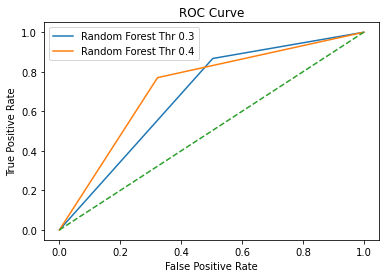

In [418]:
from sklearn.metrics import roc_curve


fpr, tpr, _ = roc_curve(y_test, (rf_model_new.predict_proba(X_test)[:,1]>0.3))
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, (rf_model_new.predict_proba(X_test)[:,1]>0.4))
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Forest Thr 0.3','Random Forest Thr 0.4'])

In [419]:
print("ROC AUC score 0.4 = ", roc_auc_score(y_test, (rf_model_new.predict_proba(X_test)[:,1]>=0.4)))
print("ROC AUC score 0.3 = ", roc_auc_score(y_test, (rf_model_new.predict_proba(X_test)[:,1]>=0.3)))

ROC AUC score 0.4 =  0.7239656662326325
ROC AUC score 0.3 =  0.6817241247549373


#### As we see the ROC AUC decreasing with the threshold of 0.3, in order to have better model predicting capability, we will keep the model with the threshold of 0.4.

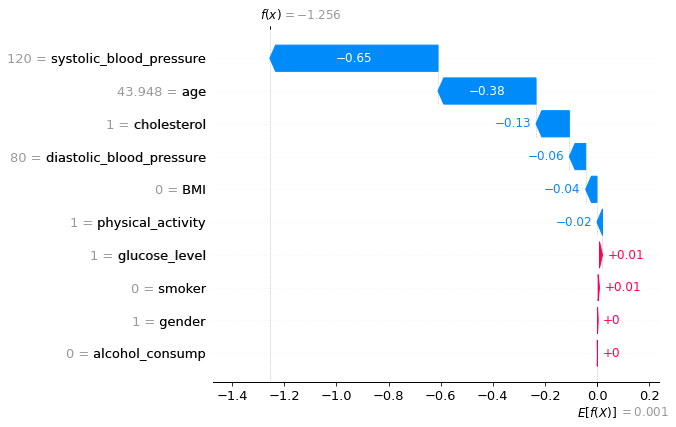

In [420]:
explainer_rf = shap.Explainer(rf_model_new)
shap_values_rf = explainer(X_test)


shap.plots.waterfall(shap_values_rf[0])

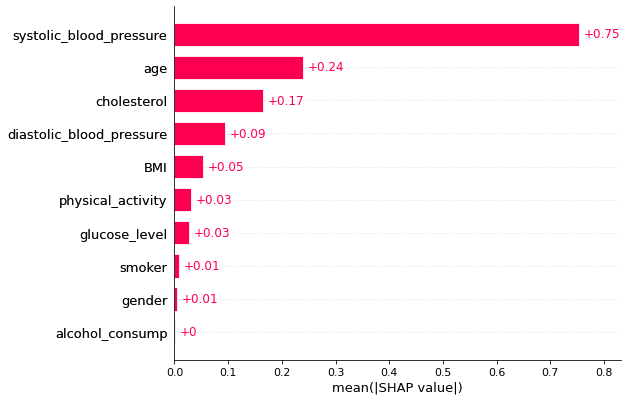

In [421]:
shap.plots.bar(shap_values_rf)

In [422]:
from sklearn.inspection import permutation_importance

In [423]:
rf_model_new.feature_importances_

array([0.21520164, 0.01255767, 0.02159034, 0.42543018, 0.19141728,
       0.08349718, 0.01977523, 0.00887799, 0.00748275, 0.01416974])

Text(0.5, 0, 'Random Forest Feature Importance')

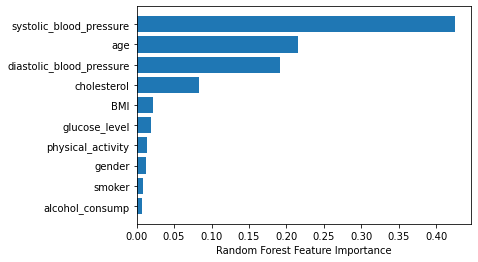

In [439]:
sorted_f = rf_model_new.feature_importances_.argsort()
plt.barh(data.columns[sorted_f], rf_model_new.feature_importances_[sorted_f])
plt.xlabel("Random Forest Feature Importance")

In [331]:
perm_importance = permutation_importance(rf_model_new, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

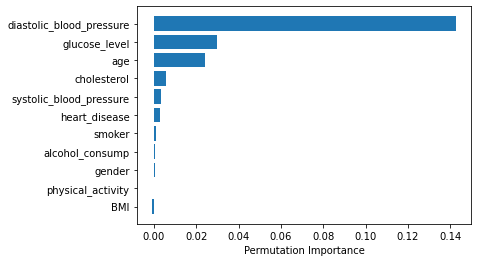

In [438]:
sorted_fc = perm_importance.importances_mean.argsort()
plt.barh(data.columns[sorted_fc], perm_importance.importances_mean[sorted_fc])
plt.xlabel("Permutation Importance")

In [428]:
data['probability']=rf_model_new.predict_proba(X)[:,1]

In [430]:
data.head()

,age,gender,BMI,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity,heart_disease,probability
0,50.391781,2,0,110,80,1,1,0,0,1,0,0.170992
1,55.419178,1,1,140,90,3,1,0,0,1,1,0.835625
2,51.663014,1,0,130,70,3,1,0,0,0,1,0.646001
3,48.282192,2,1,150,100,1,1,0,0,1,1,0.882529
4,47.873973,1,0,100,60,1,1,0,0,0,0,0.140300


In [431]:
data = data[data.systolic_blood_pressure.between(0,500)]


In [432]:

data = data[data.diastolic_blood_pressure.between(0,500)]

In [433]:
#let's see how data looks for high-risk patients
data_HR = data[data.probability>=0.85]
                 

In [434]:
data_HR.describe()

,age,gender,BMI,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity,heart_disease,probability
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,54.449844,1.382938,0.777225,152.653532,92.248406,1.788574,1.191533,0.116807,0.069115,0.807192,0.928845,0.877617
std,6.902684,0.486134,0.416135,14.978400,9.442731,0.837632,0.507352,0.321211,0.253666,0.394529,0.257101,0.020585
min,39.115068,1.000000,0.000000,10.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.850000
25%,49.420548,1.000000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.860316
50%,54.765753,1.000000,1.000000,150.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.874420
75%,60.257534,2.000000,1.000000,160.000000,100.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.890081
max,64.904110,2.000000,1.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.965331


In [435]:
data_HR.mode()

,age,gender,BMI,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity,heart_disease,probability
0,64.147945,1,1,150,90,1,1,0,0,1,1,0.859238


In [436]:
#data for patients with medium risk
data_MR=data[(data.probability<0.85)&(data.probability>0.60)]

In [437]:
data_MR.mode()

,age,gender,BMI,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoker,alcohol_consump,physical_activity,heart_disease,probability
0,59.909589,1,1,140,90,1,1,0,0,1,1,0.833868
